In [ ]:
! pip install xlrd

In [ ]:
"""
Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = 'fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1
print n_samples

In [2]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')


In [3]:
# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')


In [4]:
# Step 4: build model to predict Y
Y_predicted = X * w + b 


In [5]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)  
    condition = tf.less(residual, delta)  
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)  
    return tf.where(condition, small_res, large_res)


In [6]:
# Step 5: use the square error as the loss function
loss = huber_loss(Y,Y_predicted)#tf.square(Y - Y_predicted, name='loss') #


In [ ]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 

    writer = tf.summary.FileWriter('./my_graph/03/linear_reg', sess.graph)

    # Step 8: train the model
    for i in range(100): # train the model 100 times
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print 'Epoch {0}: {1}'.format(i, total_loss/n_samples)

    # close the writer when you're done using it
    writer.close() 

    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b]) 


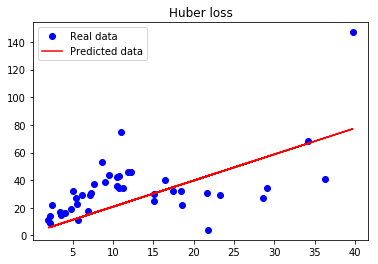

In [8]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.title('Huber loss')
plt.show()

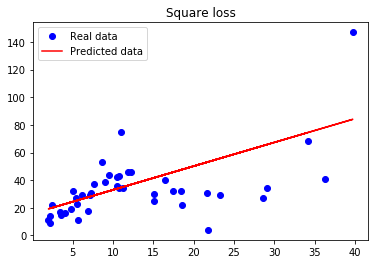

In [10]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.title('Square loss')
plt.show()